# The Multi-layer Perceptron

## Regression Problem

- Take a set of samples generated by a simple mathematical function, try to learn the generating function (that describes how the data was made) so that we can find the values of any inputs, not just the ones we have training data for.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2,2,80).reshape((80,1))
t = np.sin(0.5*np.pi*x) 

# Split into training, testing, and validation sets
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
traintarget = t[0::2,:]
testtarget = t[1::4,:]
validtarget = t[3::4,:]

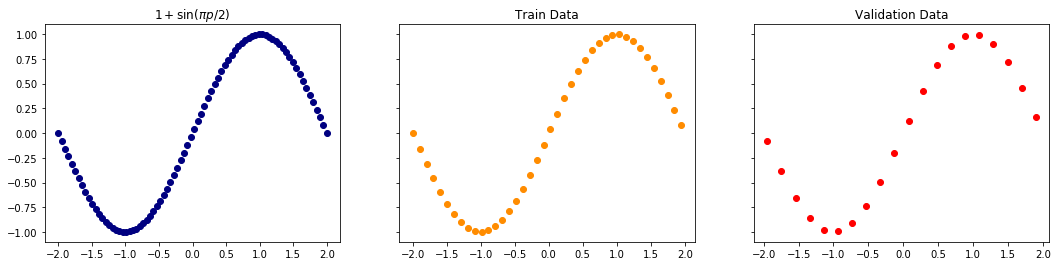

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
axs[0].plot(x, t, 'o',c='navy')
axs[0].set_title('$1 + \sin( \pi p /2 )$')

axs[1].plot(train, traintarget, 'o',c='darkorange')
axs[1].set_title('Train Data')

axs[2].plot(test, testtarget, 'o',c='r')
axs[2].set_title('Validation Data')
plt.savefig('1.png')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
class mlp:
    def __init__(self,inputs,targets,nhidden):
        self.nin = np.shape(inputs)[1]
        self.nout = np.shape(targets)[1]
        self.ndata = np.shape(inputs)[0]
        self.nhidden = nhidden
        self.it = []
        self.er = []
        # Initialise network
        self.weights1 = (np.random.rand(self.nin+1,self.nhidden)-0.5)*2/np.sqrt(self.nin)
        self.weights2 = (np.random.rand(self.nhidden+1,self.nout)-0.5)*2/np.sqrt(self.nhidden)
        print(self.weights1.shape, self.weights2.shape)
        
    def earlystopping(self,inputs,targets,valid,validtargets,eta,niterations=10):
        valid = np.concatenate((valid,-np.ones((np.shape(valid)[0],1))),axis=1)
        
        old_val_error1 = 100002
        old_val_error2 = 100001
        new_val_error = 100000
        
        count = 0
        while (((old_val_error1 - new_val_error) > 0.0001) or ((old_val_error2 - old_val_error1)>0.0001)):
            count+=1
            print(count)
            self.mlptrain(inputs,targets,eta,niterations)
            old_val_error2 = old_val_error1
            old_val_error1 = new_val_error
            validout = self.mlpfwd(valid)
            new_val_error = 0.5*np.sum((validtargets-validout)**2)
            self.it.append(count)
            self.er.append(new_val_error)
        print("Stopped", new_val_error,old_val_error1, old_val_error2)
        return new_val_error

    def mlptrain(self,inputs,targets,eta,niterations):
        inputs = np.concatenate((inputs,-np.ones((self.ndata,1))),axis=1)
        change = range(self.ndata)
    
        updatew1 = np.zeros((np.shape(self.weights1)))
        updatew2 = np.zeros((np.shape(self.weights2)))
            
        for n in range(niterations):
    
            self.outputs = self.mlpfwd(inputs)

            error = 0.5*np.sum((self.outputs-targets)**2)
            if (np.mod(n,100)==0):
                print("Iteration: ",n, " Error: ",error) 
            
            deltao = (self.outputs-targets)/self.ndata
            deltah = self.hidden*(1.0-self.hidden)*(np.dot(deltao,self.weights2.T))
            updatew1 = eta*(np.dot(inputs.T,deltah[:,:-1])) + updatew1
            updatew2 = eta*(np.dot(self.hidden.T,deltao)) + updatew2
            self.weights1 -= updatew1
            self.weights2 -= updatew2
            
    def mlpfwd(self,inputs):
        self.hidden = np.dot(inputs,self.weights1);
        self.hidden = 1.0/(1.0+np.exp(-self.hidden))
        self.hidden = np.concatenate((self.hidden,-np.ones((np.shape(inputs)[0],1))),axis=1)
        outputs = np.dot(self.hidden,self.weights2);
        return outputs

In [4]:
net = mlp(train,traintarget,2)
net.mlptrain(train,traintarget,0.001,10)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test_data = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)

outputs = net.mlpfwd(test_data)


(2, 2) (3, 1)
Iteration:  0  Error:  10.799036122992469
1
Iteration:  0  Error:  10.471403165104752
2
Iteration:  0  Error:  4.399031429936502
3
Iteration:  0  Error:  3.3956448119782214
4
Iteration:  0  Error:  3.040393884047777
5
Iteration:  0  Error:  2.782576462414562
6
Iteration:  0  Error:  2.576059895672844
7
Iteration:  0  Error:  2.4040470682138326
8
Iteration:  0  Error:  2.2582671271249177
9
Iteration:  0  Error:  2.1325218870492715
10
Iteration:  0  Error:  2.022390059831113
11
Iteration:  0  Error:  1.9244526518022544
12
Iteration:  0  Error:  1.8361133276589419
13
Iteration:  0  Error:  1.7553411077622496
14
Iteration:  0  Error:  1.6805450896554515
15
Iteration:  0  Error:  1.6104673244630225
16
Iteration:  0  Error:  1.5441174131132323
17
Iteration:  0  Error:  1.4807290304969918
18
Iteration:  0  Error:  1.419732928761118
19
Iteration:  0  Error:  1.3607449420576385
20
Iteration:  0  Error:  1.3035594865685733
21
Iteration:  0  Error:  1.2481473749705592
22
Iteration: 

205
Iteration:  0  Error:  0.24400850922020154
206
Iteration:  0  Error:  0.24314309955615832
207
Iteration:  0  Error:  0.24228477197901901
208
Iteration:  0  Error:  0.2414334358258141
209
Iteration:  0  Error:  0.24058900199197908
210
Iteration:  0  Error:  0.23975138289815334
211
Iteration:  0  Error:  0.23892049245779748
212
Iteration:  0  Error:  0.23809624604563062
213
Iteration:  0  Error:  0.23727856046684492
214
Iteration:  0  Error:  0.23646735392709384
215
Iteration:  0  Error:  0.23566254600321604
216
Iteration:  0  Error:  0.23486405761468304
217
Iteration:  0  Error:  0.23407181099575158
218
Iteration:  0  Error:  0.23328572966829905
219
Iteration:  0  Error:  0.23250573841531347
220
Iteration:  0  Error:  0.23173176325503883
221
Iteration:  0  Error:  0.230963731415744
222
Iteration:  0  Error:  0.23020157131109809
223
Iteration:  0  Error:  0.2294452125161428
224
Iteration:  0  Error:  0.2286945857438405
225
Iteration:  0  Error:  0.22794962282218117
226
Iteration:  0 

Iteration:  0  Error:  0.1477603284604202
405
Iteration:  0  Error:  0.1474866481192399
406
Iteration:  0  Error:  0.14721413170341197
407
Iteration:  0  Error:  0.14694277975360126
408
Iteration:  0  Error:  0.14667259672285599
409
Iteration:  0  Error:  0.14640359277695147
410
Iteration:  0  Error:  0.14613578642935238
411
Iteration:  0  Error:  0.14586920839014247
412
Iteration:  0  Error:  0.14560390717589097
413
Iteration:  0  Error:  0.1453399572660157
414
Iteration:  0  Error:  0.1450774709294247
415
Iteration:  0  Error:  0.1448166153217619
416
Iteration:  0  Error:  0.14455763712137934
417
Iteration:  0  Error:  0.1443008979017476
418
Iteration:  0  Error:  0.1440469247232835
419
Iteration:  0  Error:  0.14379648219122051
420
Iteration:  0  Error:  0.1435506746265908
Stopped 0.07905597717177121 0.07913716380042078 0.0792300604820741


[]

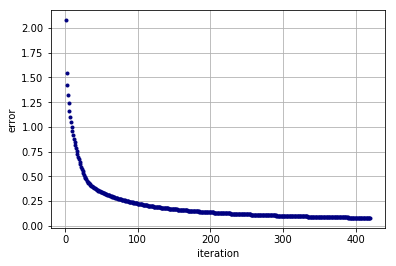

In [5]:
plt.plot(net.it, net.er, '.', c='navy')
plt.grid()
net_1_it = net.it[:80]
net_1_er = net.er[:80]
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('2.png')
plt.plot()

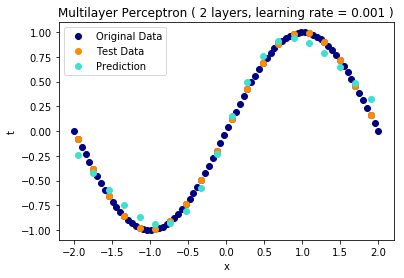

In [6]:
# Plot the data
plt.plot(x,t,'o', c='navy',label='Original Data')
plt.plot(test,testtarget ,'o', c='darkorange',label='Test Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Multilayer Perceptron ( 2 layers, learning rate = 0.001 )')
plt.plot(test_,outputs,'o', c='turquoise',label='Prediction' )
plt.legend()
plt.savefig('3.png')
plt.show()

In [7]:
net = mlp(train,traintarget,2)
net.mlptrain(train,traintarget,1,10)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test_data = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)

outputs = net.mlpfwd(test_data)

(2, 2) (3, 1)
Iteration:  0  Error:  18.275839249426134
1
Iteration:  0  Error:  10.968487920381211
2
Iteration:  0  Error:  9.270482810561372
3
Iteration:  0  Error:  8.479314457563683
4
Iteration:  0  Error:  8.295558439930726
5
Iteration:  0  Error:  8.510301726183897
6
Iteration:  0  Error:  8.894900982135258
Stopped 4.331625079745296 4.163557529549333 3.833090093007641


[]

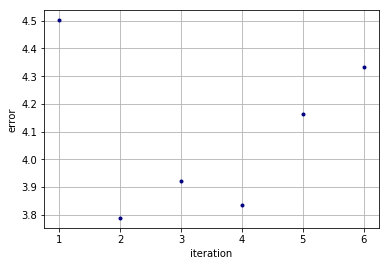

In [8]:
plt.plot(net.it, net.er, '.', c='navy')
plt.grid()
net_2_it = net.it[:80]
net_2_er = net.er[:80]
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('4.png')
plt.plot()

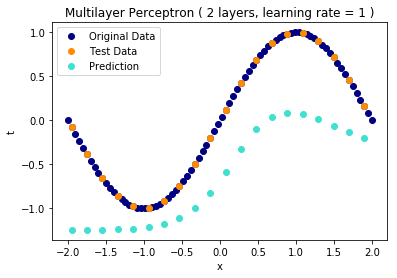

In [9]:
# Plot the data
plt.plot(x,t,'o', c='navy',label='Original Data')
plt.plot(test,testtarget ,'o', c='darkorange',label='Test Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Multilayer Perceptron ( 2 layers, learning rate = 1 )')
plt.plot(test_,outputs,'o', c='turquoise',label='Prediction' )
plt.legend()
plt.savefig('5.png')
plt.show()

In [10]:
net = mlp(train,traintarget,10)
net.mlptrain(train,traintarget,0.001,10)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test_data = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)

outputs = net.mlpfwd(test_data)

(2, 10) (11, 1)
Iteration:  0  Error:  11.130307059550617
1
Iteration:  0  Error:  10.12496580675451
2
Iteration:  0  Error:  7.920989606397075
3
Iteration:  0  Error:  6.843344743670096
4
Iteration:  0  Error:  5.072376408099744
5
Iteration:  0  Error:  4.601642164315907
6
Iteration:  0  Error:  4.042932070320566
7
Iteration:  0  Error:  3.7560072009705614
8
Iteration:  0  Error:  3.4538069649039835
9
Iteration:  0  Error:  3.2076289022687954
10
Iteration:  0  Error:  2.9610080162141252
11
Iteration:  0  Error:  2.7353394843556296
12
Iteration:  0  Error:  2.5206326736879063
13
Iteration:  0  Error:  2.322388667869153
14
Iteration:  0  Error:  2.1330467552569057
15
Iteration:  0  Error:  1.9587553812114997
16
Iteration:  0  Error:  1.785590993261629
17
Iteration:  0  Error:  1.6285059287516128
18
Iteration:  0  Error:  1.4685373056491713
19
Iteration:  0  Error:  1.3256860691294063
20
Iteration:  0  Error:  1.1807825341173332
21
Iteration:  0  Error:  1.0517321657897658
22
Iteration: 

[]

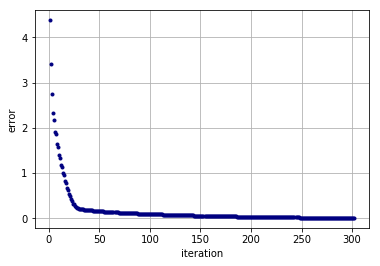

In [11]:
plt.plot(net.it, net.er, '.', c='navy')
plt.grid()

net_3_it = net.it[:80]
net_3_er = net.er[:80]
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('6.png')
plt.plot()

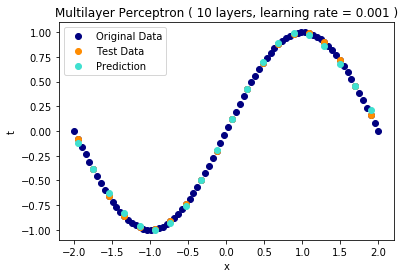

In [12]:
# Plot the data
plt.plot(x,t,'o', c='navy',label='Original Data')
plt.plot(test,testtarget ,'o', c='darkorange',label='Test Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Multilayer Perceptron ( 10 layers, learning rate = 0.001 )')
plt.plot(test_,outputs,'o', c='turquoise',label='Prediction' )
plt.legend()
plt.savefig('7.png')
plt.show()

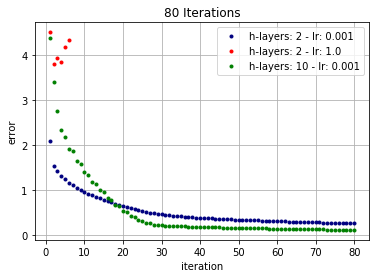

In [13]:
plt.plot(net_1_it, net_1_er, '.', label='h-layers: 2 - lr: 0.001',c='navy')
plt.plot(net_2_it, net_2_er, '.', label='h-layers: 2 - lr: 1.0',c='r')
plt.plot(net_3_it, net_3_er, '.', label='h-layers: 10 - lr: 0.001',c='g')
plt.grid()
plt.legend()
plt.title('80 Iterations')
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('8.png')
plt.show()
